In [1]:
setwd("../../../")
pacman::p_load(dplyr, ggplot2, gridExtra, vegan, ecodist)

In [2]:
immune_data="data/immuno/Immune_residue.csv"
abun_data="data/metagenomics/Specie_abundance_maaslined.csv"
kegg_data="data/metagenomics/KEGG_maaslined.csv"
bioc_data="data/metabolomics/Metabolomics_masslined.csv"
questlab_data="data/quest_lab/Quest_lab_maaslined.csv"
score_data="codes/AI/input/score.csv"
meta_data="data/metadata/Metadata_061523.csv"

---
# Input data

In [3]:
abun = read.csv(abun_data, row.names = 1)
immune = read.csv(immune_data, row.names = 1)
kegg = read.csv(kegg_data, row.names = 1)
bioc = read.csv(bioc_data, row.names = 1)
questlab = read.csv(questlab_data, row.names = 1)
score = read.csv(score_data, row.names = 1) %>% t()
meta = read.csv(meta_data, row.names = 1)

In [4]:
plot_bc_pcoa = function(table, title, legend_position=c(0.95, 0.05)){
    meta_data="data/metadata/Metadata_061523.csv"
    meta = read.csv(meta_data, row.names = 1)
    
    bray_curtis_dist = vegan::vegdist(t(table), method = "bray")
    bray_curtis_pcoa = ecodist::pco(bray_curtis_dist)
    bray_curtis_pcoa_df = data.frame(pcoa1 = bray_curtis_pcoa$vectors[,1], 
                                pcoa2 = bray_curtis_pcoa$vectors[,2])
    bray_curtis_pcoa_df = cbind(bray_curtis_pcoa_df, meta[colnames(table),])
    custom_colors = c("Control" = "#3b83ca", "MECFS" = "#ca3b3b")
    p = ggplot(data = bray_curtis_pcoa_df, aes(x=pcoa1, y=pcoa2, color = study_ptorhc)) +
    geom_point(size=0.5) +
    scale_color_manual(values = custom_colors) + 
    labs(x = "PC1",
       y = "PC2", 
       title = title) +
    theme(legend.position = legend_position, 
        legend.justification = c("right", "bottom"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.5, "lines"),
        legend.text = element_text(size = 6),
        legend.title = element_text(size = 6),
        plot.title = element_text(size = 10),
        axis.text = element_text(size = 5), 
        axis.title = element_text(size = 5),
        panel.background = element_blank(),  
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), 
        panel.border = element_rect(colour = "black", fill=NA, linewidth=1))
    return(p)
}

In [5]:
p_score = plot_bc_pcoa(score, "Bray-Curtis PCoA\nClinical Score")
p_immune = plot_bc_pcoa(immune, "\nImmune","none")
p_abun = plot_bc_pcoa(abun, "Specie Abundance ","none")
p_kegg = plot_bc_pcoa(kegg, "KEGG gene","none")
p_questlab = plot_bc_pcoa(questlab, "Blood Measure","none")
p_bioc = plot_bc_pcoa(bioc, "Plasma Metabolome","none")

Warning message in vegan::vegdist(t(table), method = "bray"):
“results may be meaningless because data have negative entries
                 in method “bray””


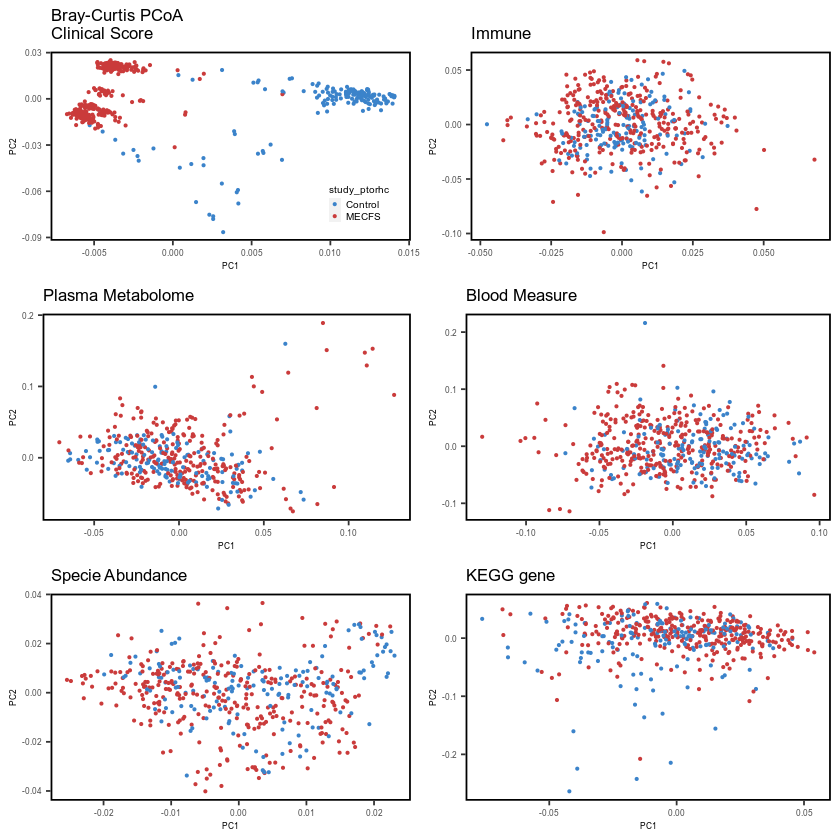

In [6]:
p = grid.arrange(p_score, p_immune, p_bioc, p_questlab, p_abun, p_kegg, nrow = 3, ncol = 2)
#ggsave("output/AI_figure/6_Omics_PCoA.pdf",plot = p, dpi = 1000,width = 4, height = 6)